<a href="https://colab.research.google.com/github/Davidperea99/DavidPerea/blob/main/Semana2/TallerLimpiezaPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELOS PREDICTIVOS PARA SISTEMAS INTELIGENTES

## Ejercicio: Limpieza usando pandas

In [ ]:
# Cargar el dataset DailyDelhiClimateTrain.csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

dataTaller = pd.read_csv("/content/DailyDelhiClimateTrain (1).csv", header = 0)
dataTaller.head()

In [85]:
# Verificar las estadísticas generales del dataset
# Revisar la información, encuentre en los datos máximos y mínimos de las variables
# Revisar si encuentra algo fuera de lo normal

dataTaller.describe()

#se evidencia valor negativo en la columna presionmedia para el valor minimo
#la desviacion estandar en la columna presionmedia es muy alto en comparacion
#a los demas datos

#valores minimos y maximos
min_values = dataTaller.min()
max_values = dataTaller.max()

print("Valores mínimos por columna:")
print(min_values)

print("Valores máximos por columna:")
print(max_values)



Valores mínimos por columna:
date            2013-01-01
meantemp               6.0
humidity         13.428571
wind_speed             0.0
meanpressure     -3.041667
dtype: object
Valores máximos por columna:
date             2017-01-01
meantemp          38.714286
humidity              100.0
wind_speed            42.22
meanpressure    7679.333333
dtype: object


In [7]:
# Eliminar las columnas meantemp, humidity y wind_speed. Mantenga la columna meanpressure
data_aux = dataTaller.drop(['meantemp','humidity','wind_speed'], axis=1)
data_aux.head()

,date,meanpressure
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000


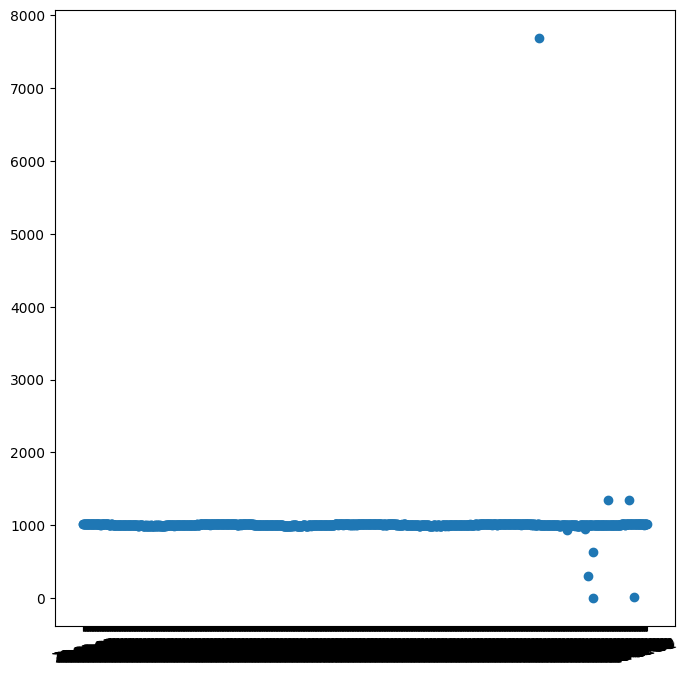

In [65]:
# Graficar los datos del campo meanpressure
# Qué puede decir de la gráfica?
# la grafica muestra una leve dispersion para datos atipicos


# Hay algo atípico en esa respuesta temporal?
#se evidencian valores atipicos por fuera de los valores normales

import matplotlib.dates as mdates
%matplotlib inline
plt.rc('figure',figsize=(8,8))
data_aux = data_aux.dropna()
plt.scatter(data_aux.date,data_aux.meanpressure)
plt.xticks(rotation = 15)
dtFmt = mdates.DateFormatter('%y-%m-%d')
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.show()




<Axes: ylabel='meanpressure'>

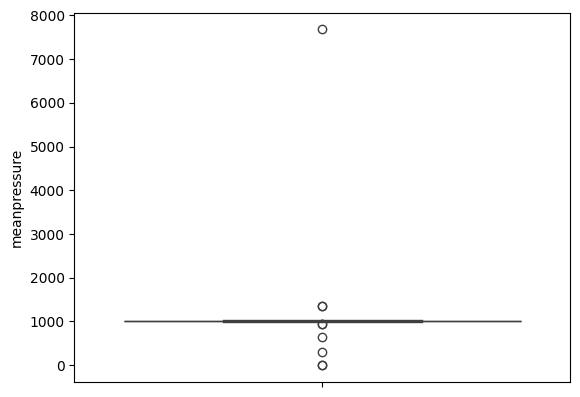

In [9]:
# Realice un diagrama de cajas y alambres para determinar visualmente si hay outliers
sns.boxplot(data=data_aux['meanpressure'])

In [11]:
# Calcular el parámetro Zscore para la columna meanpressure
df2 = data_aux.loc[:,['meanpressure']].dropna().apply(stats.zscore)
df2.head()

,meanpressure
0,0.025321
1,0.037162
2,0.041972
3,0.033647
4,0.029946


In [50]:
# Variar el valor del humbral de Zscore para filtrar valores atípicos hasta que considere que la gráfica de la variable
#  meanpressure sea correcta

Zscore = np.abs(stats.zscore(data_aux.loc[:,['meanpressure']]))
index, flag = np.where(Zscore > 3)
print(index)
print(flag)

data_aux.loc[index]

[1182 1309 1323 1427]
[0 0 0 0]


,date,meanpressure
1182,2016-03-28,7679.333333
1309,2016-08-02,310.437500
1323,2016-08-16,-3.041667
1427,2016-11-28,12.045455


In [62]:
# Para los datos sin outliers verificar nuevamente las estadísticas generales
# Qué puede decir de los valores máximos y mínimos de los datos filtrados

data_out=data_aux[(Zscore < 0.3).all(axis=1)]
data_out.head()




,date,meanpressure
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000


,meanpressure
count,1453.000000
mean,1008.269018
std,7.437835
min,991.375000
25%,1001.625000
50%,1008.571429
75%,1014.937500
max,1023.000000


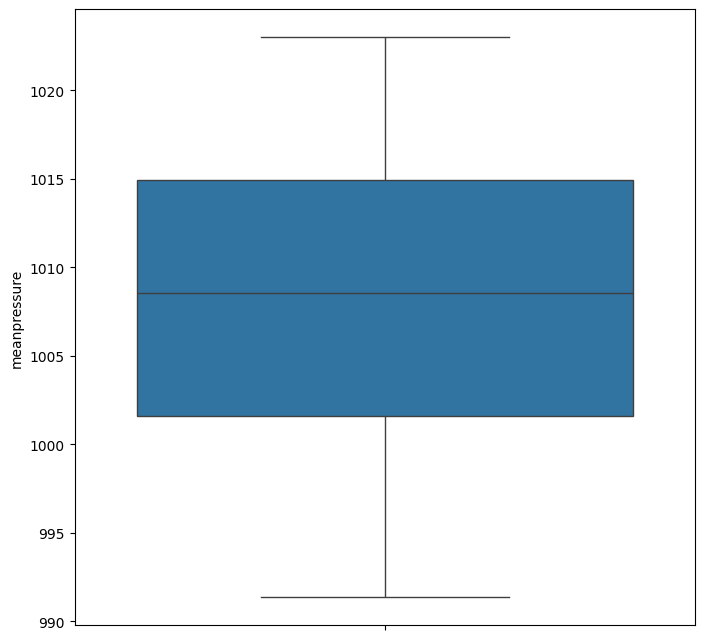

In [64]:
# Realice un diagrama de cajas y alambres para determinar visualmente si aún hay outliers
sns.boxplot(data=data_out['meanpressure'])
data_out.describe()

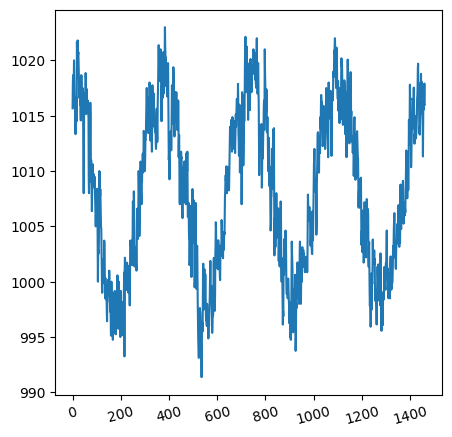

In [74]:
import matplotlib.dates as mdates
%matplotlib inline
plt.rc('figure',figsize=(5,5))
data_out = data_out.dropna()
plt.plot(data_out['meanpressure'])
plt.xticks(rotation = 15)
##plt.gca().xaxis.set_major_formatter(dtFmt)
##dtFmt = mdates.DateFormatter('%y-%m-%d')
plt.show()